In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy.random as r
from tqdm import tqdm
from scipy.optimize import minimize_scalar
from functools import partial
import math

## Measurement error

In [2]:
def modulo_2pi(num):
    result = num % (2 * math.pi)
    if result > math.pi:
        result -= 2 * math.pi
    elif result <= -math.pi:
        result += 2 * math.pi
    return result


# Define the objective function you want to minimize
def F(x,l,z):
    return -(2/((1+1/l)*x**2))*(1-np.cos(x)/np.cosh(x/np.sqrt(l)))+2*z/x**2

def v(z,l):
    #optimal speed
    
    F_fixed = partial(F, l=l, z=z)
    
    # Perform the minimization
    result = minimize_scalar(F_fixed, bounds=(0, np.pi+0.01), method='bounded')
    
    
    return max([0,-result.fun,-F(np.pi,l,z)])

def theta_a(z,l):
    #optimal activation angle
    F_fixed = partial(F, l=l, z=z)
    
    # Define the interval over which you want to minimize the function
    
    # Perform the minimization
    result = minimize_scalar(F_fixed, bounds=(0, np.pi+0.01), method='bounded')
    
    if result.fun<0:
        return result.x
    else:
        return 4
    
def modulo_2pi(num):
    result = num % (2 * math.pi)
    if result > math.pi:
        result -= 2 * math.pi
    elif result <= -math.pi:
        result += 2 * math.pi
    return result

100%|█████████████████████████████████████████████| 6/6 [01:09<00:00, 11.53s/it]


Text(0, 0.5, '$v^*/v_0$')

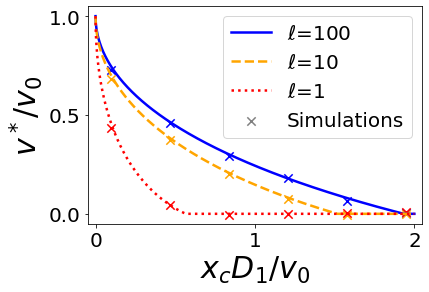

In [3]:
t_f=10000#total time
dt=0.01#timestep


for l in [100,10,1]:
    
    zs=np.linspace(0,2,1000)
    vs=[v(z,l) for z in zs]
    
    zs_sims=np.linspace(0.1,1.95,6)
    v_sims=[]
    for z in tqdm(zs_sims):
        thetaa=theta_a(z,l)
        t=0
        x=0
        theta1=0
        theta2=0
        #Langevin dynamics
        while t<t_f:
            if np.abs(theta1)<thetaa:
                theta1=modulo_2pi(theta1+np.sqrt(2*dt)*r.normal())
                theta2=modulo_2pi(theta2+np.sqrt(2*dt/l)*r.normal())
                x=x+np.cos(theta1+theta2)*dt
            else:
                theta1=0
                theta2=0
                x=x-z
            t=t+dt
        v_sims.append(x/t_f)
        
    if l==100:
        plt.plot(zs,vs,label=r'$\ell$='+str(l),linewidth=2.5,color='blue')
        plt.scatter(zs_sims,v_sims,marker='x',color='blue',s=70)
    if l==10:
        plt.plot(zs,vs,label=r'$\ell$='+str(l),linestyle='--',linewidth=2.5,color='orange')
        plt.scatter(zs_sims,v_sims,marker='x',color='orange',s=70)

    if l==1:
        plt.plot(zs,vs,label=r'$\ell$='+str(l),linestyle=':',linewidth=2.5,color='red')
        plt.scatter(zs_sims,v_sims,marker='x',color='red',s=70)
        plt.scatter([-1],[-1],marker='x',color='grey',label='Simulations',s=70)

plt.xlim(-0.05,2.05)
plt.ylim(-0.05,1.05)
plt.legend(fontsize=20)
plt.locator_params(nbins=4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel(r'$x_c D_1/v_0$',fontsize=30)
plt.ylabel(r'$v^*/v_0$',fontsize=30)